<a href="https://colab.research.google.com/github/mxchauhan/Capstone/blob/master/Unit_3_Capstone_Google_Playstore_App_Ratings_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Rating of Google Playstore Apps

In this capstone project, we will conduct analysis and modeling on Google Playstore's downloads data.

The data includes information on app ratings, the size of the app, the number of reviews, as well as the number of installs.  It also includes categorical data such as the genre and version of the app.

We will apply feature engineering to this data as well as supervised learning models to predict the app rating.

##DATA IMPORTING

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Upload data and rename data column names

dataPath = ("https://raw.githubusercontent.com/mxchauhan/Capstone/master/googleplaystore.csv")

data = pd.read_csv(dataPath)

data.columns = ['app',
                'category',
                'rating',
                'reviews',
                'size',
                'installs',
                'type',
                'price',
                'contentRating',
                'genres',
                'updated',
                'version',
                'androidVersion']

data.head()

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [0]:
data.shape

(10841, 13)

## DATA CLEANING

Below we determine the number of rows with NaN values and drop them.

In [0]:
# Count NaNs

data.isnull().values.ravel().sum()

1487

In [0]:
# Drop the NaNs
data.dropna(inplace=True)

# Check that the inplace transformation worked
data.isnull().values.ravel().sum()

0

In [0]:
# Row and column count after dropping
data.shape

(9360, 13)

Below we get all unique values of all columns to determine necessary steps to clean and convert applicable columns into numeric columns so that they can later be used as features.

In [0]:
# All unique values for size of apps

data['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [0]:
# Masks for taking mega and kilo values to later convert these string values
# to numeric types

mega = data['size'].str.contains('M')
kilo = data['size'].str.contains('k')

In [0]:
# Convert size column from string to numeric

data['size'] = data['size'].str.strip('k')
data['size'] = data['size'].str.strip('M')
data['size'] = pd.to_numeric(data['size'], errors='coerce')

In [0]:
# Convert mega and kilo values to standard bytes

data['size'].loc[mega] = data['size'].loc[mega] * 1000000
data['size'].loc[kilo] = data['size'].loc[kilo] * 1000

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# All unique values for installs

data.installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [0]:
# Clean installs to later convert to numeric

data.installs = data.installs.str.strip('+')
data.installs = data.installs.str.replace(',','')
data.installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [0]:
# All unique values for type

data['type'].unique()

array(['Free', 'Paid'], dtype=object)

In [0]:
# We drop the type column, as it's redundant with the price column (a price = 0 means that the app is free).

data.drop('type', axis=1, inplace=True)

In [0]:
# All unique values for price

data.price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

In [0]:
# Clean price to later convert to numeric

data.price = data.price.str.strip('$')
data.price = data.price.str.strip(' ')

data.price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [0]:
# All unique values for content rating

data.contentRating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [0]:
print ((data.contentRating == 'Unrated').astype(int).sum())

1


In [0]:
# Mask to convert contentRating to numeric

everyone = data['contentRating'] == 'Everyone'
everyone10 = data['contentRating'] == 'Everyone 10+'
teen = data['contentRating'] == 'Teen'
mature = data['contentRating'] == 'Mature 17+'
adult = data['contentRating'] == 'Adults only 18+'
unrated = data['contentRating'] == 'Unrated'

data['contentRating'].loc[everyone] = 0
data['contentRating'].loc[everyone10] = 10
data['contentRating'].loc[teen] = 13
data['contentRating'].loc[mature] = 17
data['contentRating'].loc[adult] = 18
data['contentRating'].loc[unrated] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# All unique values for genres

data.genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [0]:
# split unique values into arrays to later apply one hot encoding

data['genres'] = data.genres.str.split(';')

In [0]:
# All unique values for updated

data['updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [0]:
# All unique values for version

data.version.unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [0]:
# All unique values for android version

data.androidVersion.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [0]:
# Drop updated, version, and androidVersion

data.drop('updated', axis=1, inplace=True)
data.drop('version', axis=1, inplace=True)
data.drop('androidVersion', axis=1, inplace=True)

We drop both the date of update and androidVersion columns, as we don't find them particularly informative. The [high segmentation of the Android market](https://sensortower.com/blog/how-to-handle-android-segmentation-when-developing-a-google-play-app) can be source of noise. Additionally, many of our entries have a "varies with device" value in the version specification.

![android version](https://s3.amazonaws.com/sensortower-itunes/blog/0141-android-versions.jpg)

In [0]:
# Convert remaining columns to numeric

data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')
data['installs'] = pd.to_numeric(data['installs'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [0]:
# we drop ratings equal to zero, as the app store doesn't allow a real user 
# rating to be equal to zero

data = data[data['rating']> 0]

In [0]:
data.head()

,app,category,rating,reviews,size,installs,price,contentRating,genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,0,[Art & Design]
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,0,"[Art & Design, Pretend Play]"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0.0,0,[Art & Design]
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0.0,13,[Art & Design]
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0.0,0,"[Art & Design, Creativity]"


In [0]:
# Final row and column count after data cleaning

data.shape

(9360, 9)

##DATA EXPLORATION

Below we will conduct an exploratory analysis of our variables and the relationships between them.

###Rating

In [0]:
data.rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

The median rating is 4.3.  We will later use this value to create a binary feature for rating.

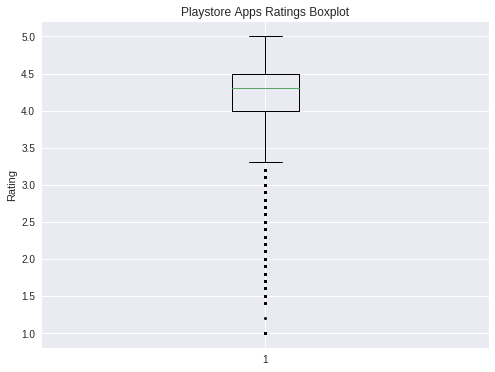

In [0]:
x = data.rating
plt.figure(figsize = (8, 6))
plt.ylabel('Rating')
plt.title('Playstore Apps Ratings Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

In [0]:
data['rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [0]:
# Determine rating counts
# https://stackoverflow.com/a/39787748/45963
ratings, counts = np.unique(data['rating'], return_counts=True)

d = {'ratings': ratings, 'counts': counts}

ratingCounts = pd.DataFrame(data=d)

ratingCounts.sort_values('counts', ascending = False).head(10)

,counts,ratings
32,1108,4.4
31,1076,4.3
33,1037,4.5
30,951,4.2
34,823,4.6
29,707,4.1
28,567,4.0
35,499,4.7
27,386,3.9
26,303,3.8


4.4 is the most frequent rating. 

Text(0.5,1,'Distribution of Ratings')

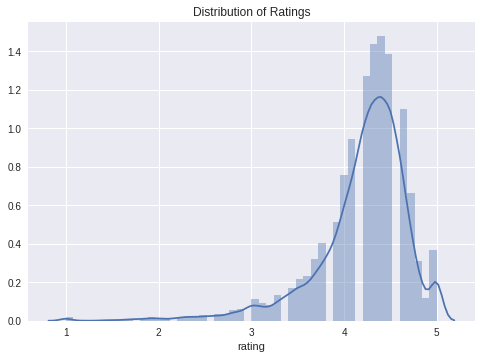

In [0]:
# Import library and dataset
import seaborn as sns
 
sns.distplot(data["rating"])
plt.title('Distribution of Ratings')

The rating distribution is skewed to the right.

Text(0.5,1,'Distribution of Log(Rating)')

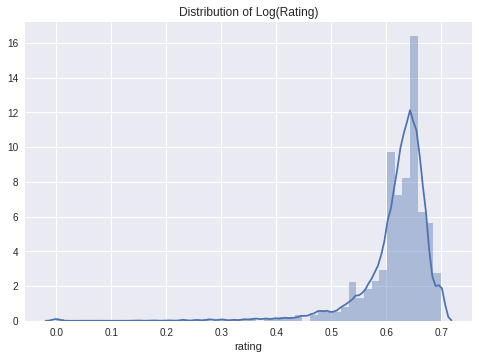

In [0]:
sns.distplot(np.log10(data["rating"]))
plt.title('Distribution of Log(Rating)')

Applying log to the rating column helps to slightly smooth out the distribution.

Text(0.5,1,'Distribution of Sqrt(Rating)')

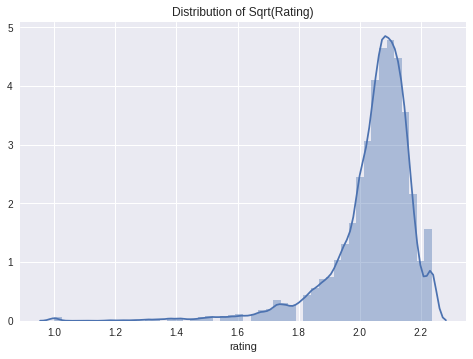

In [0]:
sns.distplot(np.sqrt(data["rating"]))
plt.title('Distribution of Sqrt(Rating)')

Applying the square root function to rating also helps to smooth out the distribution and makes it slightly more normal.

### Reviews

In [0]:
data.reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: reviews, dtype: float64

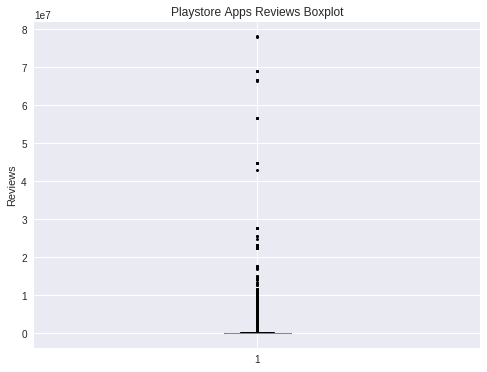

In [0]:
x = data.reviews
plt.figure(figsize = (8, 6))
plt.ylabel('Reviews')
plt.title('Playstore Apps Reviews Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

The boxplot obtained is what one would expect out of a large [long tailed distribution](https://en.wikipedia.org/wiki/Long_tail). We use a histogram here to show it. 

https://python-graph-gallery.com/20-basic-histogram-seaborn/

Text(0.5,1,'Distribution of Reviews')

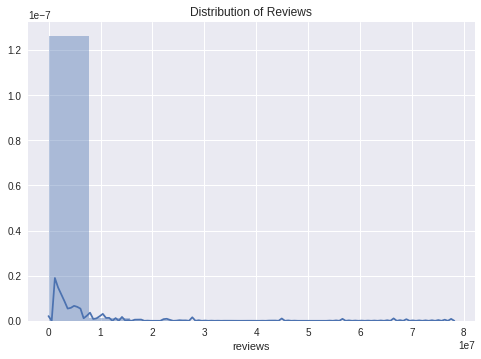

In [0]:
sns.distplot(data["reviews"], bins=10)
plt.title('Distribution of Reviews')

In [0]:
data["reviews"].mode()

0    2
dtype: int64

In [0]:
data['reviews'].max()

78158306

In [0]:
# we pick from the dataset the apps that have at least 10 reviews
data = data[data['reviews'] >= 10]
data.shape

(8764, 9)

In [0]:
# we have apps in the range of 10 reviews up to 78 million reviews 
np.sort(data.reviews.unique())

array([      10,       11,       12, ..., 69119316, 78128208, 78158306])

Text(0.5,1,'Distribution of Sqrt(Reviews)')

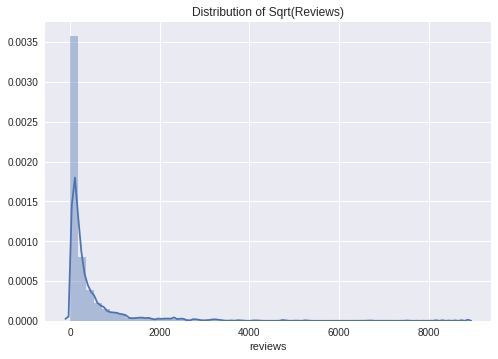

In [0]:
sns.distplot(np.sqrt(data["reviews"]))
plt.title('Distribution of Sqrt(Reviews)')

Text(0.5,1,'Distribution of Log(Reviews)')

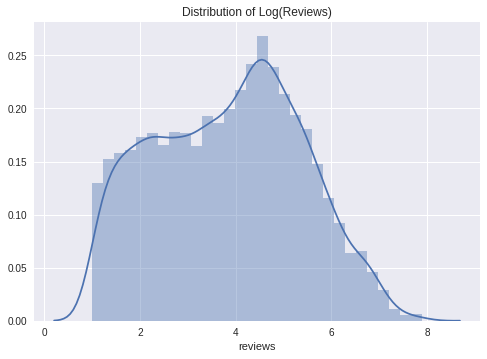

In [0]:
sns.distplot(np.log10(data["reviews"]))
plt.title('Distribution of Log(Reviews)')

Applying the square root and log functions to reviews helps to smooth out the distribution.

### Price

In [0]:
data['price'].describe()

count    8764.000000
mean        0.943261
std        15.769995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: price, dtype: float64

In [0]:
print('mode of price is = ' + str(data['price'].mode()[0]))

mode of price is = 0.0


In [0]:
data['price'].value_counts().sort_values(ascending = False).head(10)

0.00    8197
2.99     102
0.99      86
4.99      64
1.99      56
3.99      53
1.49      19
2.49      19
5.99      17
9.99      14
Name: price, dtype: int64

The majority of apps are free.

In [0]:
nonFreeApps = data[data['price'] > 0]
nonFreeApps.shape

(567, 9)

There are only a small number of non-free apps in the Google Play Store.

In [0]:
nonFreeApps['price'].describe()

count    567.000000
mean      14.579788
std       60.424951
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: price, dtype: float64

In [0]:
nonFreeApps['price'].value_counts().head(10)

2.99    102
0.99     86
4.99     64
1.99     56
3.99     53
1.49     19
2.49     19
5.99     17
9.99     14
6.99     13
Name: price, dtype: int64

2.99 is the most common price for paid apps.

Text(0.5,1,'Distribution of Price')

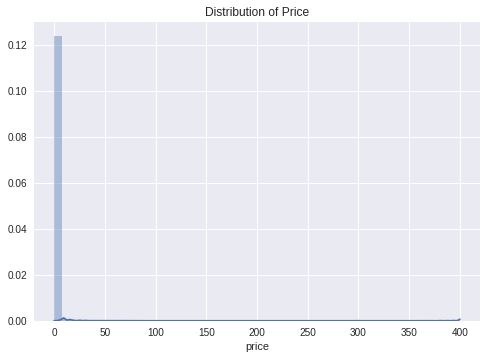

In [0]:
sns.distplot(data["price"])
plt.title('Distribution of Price')

Text(0.5,1,'Distribution of Price of Paid Apps')

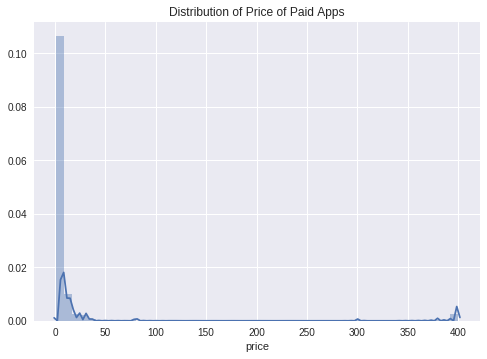

In [0]:
sns.distplot(nonFreeApps["price"], bins = None)
plt.title('Distribution of Price of Paid Apps')

Both distrubtions of all prices and prices of paid apps are skewed to the left.  These are long-tailed distributions.

### Variable Comparisons

The scatterplot shows that apps that have higher ratings tend to be more popular, as they have a higher number of reviews. 

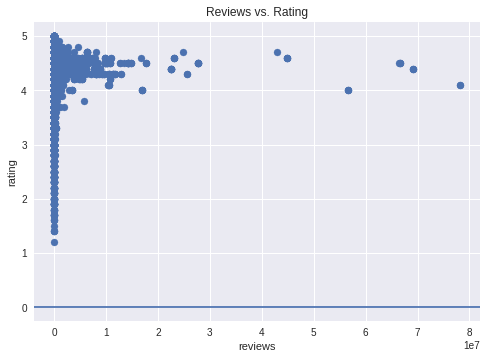

In [0]:
plt.scatter(data.reviews, data.rating)
plt.xlabel('reviews')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Reviews vs. Rating')
plt.show()

We seem to have a long tailed distribution, which has its own sets of challenges/considerations for regression analysis. 

http://mockinterview.co/index.php/question/explain-what-a-long-tailed-distribution-is-and-provide-three-examples-of-relevant-phenomena-that-have-long-tails-why-are-they-important-in-classification-and-regression-problems/

We will use [log-log plots](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) of reviews vs ratings for regression analysis, as [the columns of reviews, ratings, and price are long-tailed distributions](https://stats.stackexchange.com/questions/111385/how-to-best-plot-a-heavy-vs-light-tailed-distribution-in-r).



In [0]:
data['logRating'] = np.log10(data['rating']) # this is broadcasting the function and is faster, and is O(c) because it's applied simultaneously on all values
data['logReviews']= np.log10(data['reviews'])

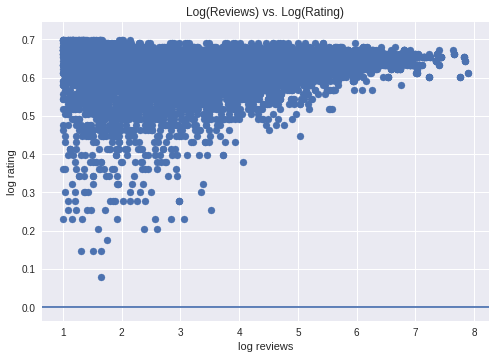

In [0]:
plt.scatter(data.logReviews, data.logRating)
plt.xlabel('log reviews')
plt.ylabel('log rating')
plt.axhline(y=0)
plt.title('Log(Reviews) vs. Log(Rating)')
plt.show()

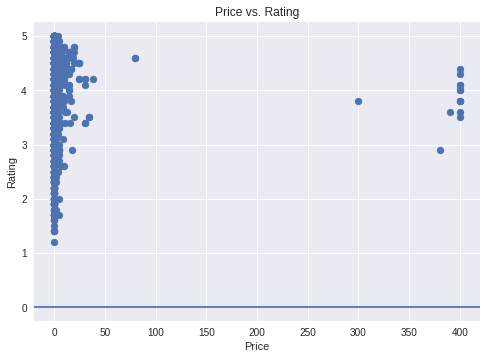

In [0]:
plt.scatter(data.price, data.rating)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Price vs. Rating')
plt.show()

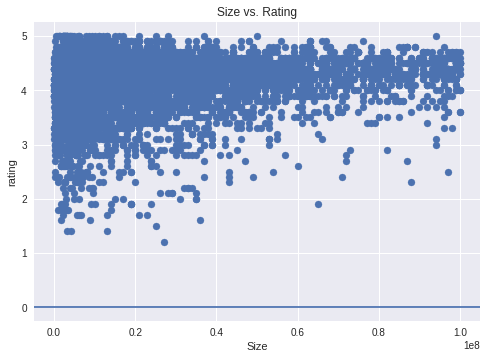

In [0]:
plt.scatter(data['size'], data.rating)
plt.xlabel('Size')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Size vs. Rating')
plt.show()

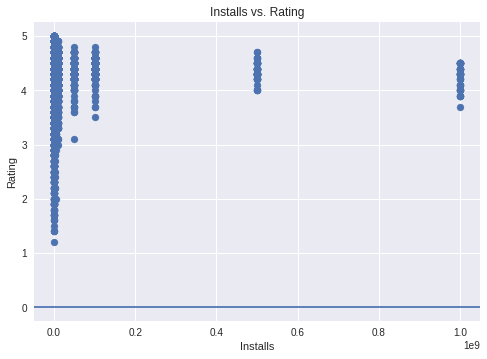

In [0]:
plt.scatter(data.installs, data.rating)
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Installs vs. Rating')
plt.show()

### Correlations

A comparison of Pearson vs Spearman correlation is interesting here. For Pearson correlation analysis, the variables should be normally distributed, which is not the case for these distributions: the distribution of price has a long tail and the distribution of rating is skewed to the left. The Pearson correlation value is derived from the fitting of a regular linear regression, as the distributions here are not normally distributed and highly disimilar the correlation appears to be low, negative and not statistically significant (the p-value > 0.5). The P-value is the probability that we would have found the current result if the correlation coefficient were $= 0$(null hypothesis). If this probability is lower than the conventional $5\%$ ($\textit{p-value}<0.05$) the correlation coefficient is called statistically significant.

Spearman's rank correlation only cares about the agreement of the rankings in price and rating. It's low value and its low p-value indicate that there is low agreement between increases or decreases in price and rating.  Spearman's rank correlation is more appropriate for testing non-linear relationships between variables than Pearson's correlation. Spearman correlation checks for the agreement in a monotonic relationship  in the features. When one feature increases or decrease, so does the other feature increase or decrease. Pearson correlation checks for the agreement in a linear relationship between the features, which is more limited and depends on the assumption of normality in the distributions of the features, which we don't have here for most features. 

In [0]:
from scipy.stats import pearsonr

pearsonr(data.logReviews, data.logRating)

(0.277118129416633, 2.8818486894882607e-154)

In [0]:
from scipy.stats import spearmanr

spearmanr(data.logReviews, data.logRating)

SpearmanrResult(correlation=0.22507263546920386, pvalue=4.643283259047502e-101)

There is a low Pearson correlation as well as low Spearman correlation between log(reviews) and log(ratings).  The p-value is extremely low which shows that the low correlation and low agreement between the variables, respectively, is statistically significant.

                 rating   reviews      size  installs     price  \
rating         1.000000  0.077456  0.096549  0.058464 -0.026701   
reviews        0.077456  1.000000  0.241176  0.640845 -0.010001   
size           0.096549  0.241176  1.000000  0.161196 -0.027209   
installs       0.058464  0.640845  0.161196  1.000000 -0.012117   
price         -0.026701 -0.010001 -0.027209 -0.012117  1.000000   
contentRating  0.010486  0.071021  0.203896  0.043965 -0.016597   
logRating      0.988915  0.073519  0.096965  0.059334 -0.023226   
logReviews     0.272079  0.333980  0.375096  0.355985 -0.051437   

               contentRating  logRating  logReviews  
rating              0.010486   0.988915    0.272079  
reviews             0.071021   0.073519    0.333980  
size                0.203896   0.096965    0.375096  
installs            0.043965   0.059334    0.355985  
price              -0.016597  -0.023226   -0.051437  
contentRating       1.000000   0.018548    0.173043  
logRating         

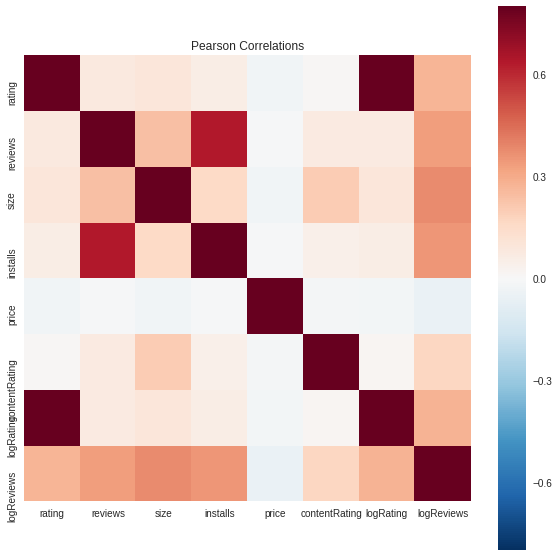

In [0]:
corrmat = data.corr('pearson')
print(corrmat)

plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title('Pearson Correlations')
plt.show()

                 rating   reviews      size  installs     price  \
rating         1.000000  0.225073  0.086369  0.126362  0.068052   
reviews        0.225073  1.000000  0.387668  0.957675 -0.193045   
size           0.086369  0.387668  1.000000  0.357895 -0.048458   
installs       0.126362  0.957675  0.357895  1.000000 -0.283524   
price          0.068052 -0.193045 -0.048458 -0.283524  1.000000   
contentRating -0.019988  0.177209  0.222351  0.141316 -0.040202   
logRating      1.000000  0.225073  0.086369  0.126362  0.068052   
logReviews     0.225073  1.000000  0.387668  0.957675 -0.193045   

               contentRating  logRating  logReviews  
rating             -0.019988   1.000000    0.225073  
reviews             0.177209   0.225073    1.000000  
size                0.222351   0.086369    0.387668  
installs            0.141316   0.126362    0.957675  
price              -0.040202   0.068052   -0.193045  
contentRating       1.000000  -0.019988    0.177209  
logRating         

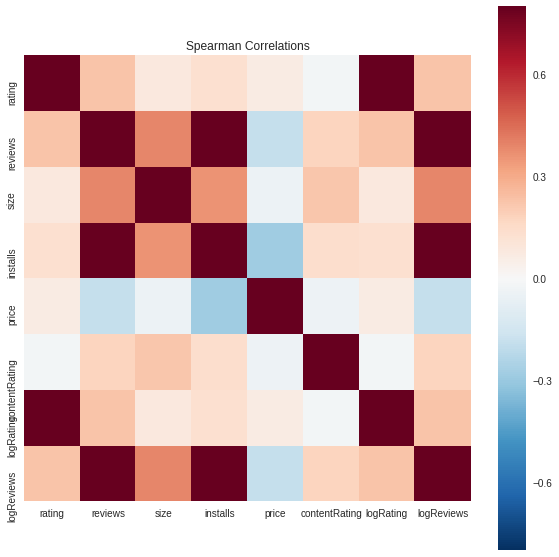

In [0]:
corrmat = data.corr('spearman')
print(corrmat)

plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title('Spearman Correlations')
plt.show()

##FEATURES

### Creating features

In [0]:
features = data[['rating', 'reviews', 'size','installs', 'price', 'contentRating', 'logReviews', 'logRating']]

In [0]:
# Add a binary feature that evaluates to true
# when rating is above the median (useful for logistic regression)

features['positiveRating'] = np.where(data['rating']>=4.3, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# Add feature transformations in order to fit higher order polynomials into the data

features['reviews2'] = (features['reviews'] ** 2)
features['reviews3'] = (features['reviews'] ** 3)
features['reviews4'] = (features['reviews'] ** 4)

features['installs2'] = (features['installs'] ** 2)
features['installs3'] = (features['installs'] ** 3)
features['installs4'] = (features['installs'] ** 4)

features['price2'] = (features['price']  ** 2)
features['price3'] = (features['price'] ** 3)
features['price4'] = (features['price'] ** 4)

features['installsXreviews'] = features['installs'] * features['reviews']
features['installs2Xreviews2'] = features['installs2'] * features['reviews2']

features ['sqrtReviews'] = features['reviews'] ** (1/2)
features ['sqrtInstalls'] = features['installs'] ** (1/2)
features ['sqrtPrice'] = features['price'] ** (1/2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# Use one hot encoding to create features for each genre

features2 = pd.get_dummies(data['genres'].apply(pd.Series).stack()).sum(level=0)
features2.head()

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Counts of all genres

genres = features2.sum(axis=0).sort_values(ascending=False)
other = genres[41:].sum()
genres = genres[:41]
genres.loc[42] = other
genres.rename(index = {42:'Other'}, inplace=True)
genres

Tools                      680
Education                  594
Entertainment              536
Action                     370
Productivity               329
Sports                     325
Communication              306
Photography                304
Finance                    301
Medical                    290
Personalization            283
Lifestyle                  282
Health & Fitness           280
Business                   258
Casual                     254
Social                     246
Shopping                   227
News & Magazines           223
Travel & Local             219
Arcade                     215
Simulation                 209
Dating                     177
Books & Reference          170
Video Players & Editors    161
Puzzle                     143
Action & Adventure         135
Maps & Navigation          115
Role Playing               115
Racing                     112
Strategy                   107
Food & Drink               106
Educational                101
Adventur

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


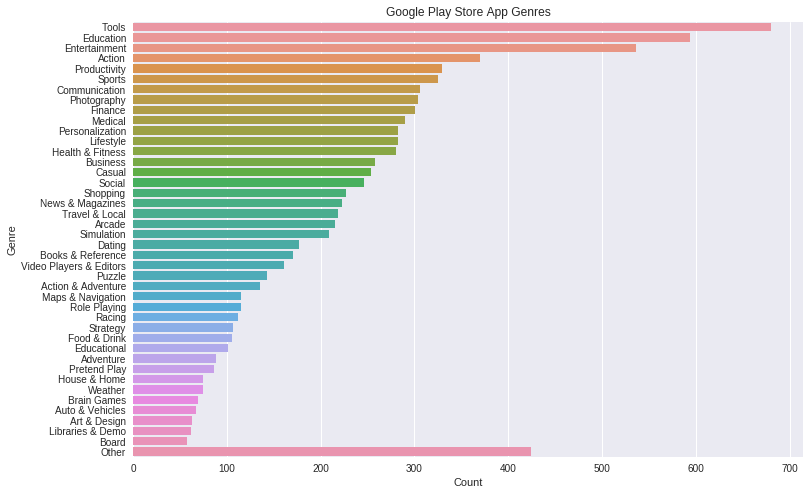

In [0]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.barplot(y=genres.index, x=genres.values)
plt.title('Google Play Store App Genres')
plt.ylabel('Genre')
plt.xlabel('Count')
plt.show()

In [0]:
# Combine all features into one dataframe

featuresAll = pd.concat([features, features2], axis=1)

In [0]:
# Some transformations and feature additions may have resulted in NaN values

featuresAll.isnull().values.ravel().sum()

1629

In [0]:
# Drop NaN values
featuresAll.dropna(inplace=True)

In [0]:
featuresAll.head()

,rating,reviews,size,installs,price,contentRating,logReviews,logRating,positiveRating,reviews2,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.1,159,19000000.0,10000,0.0,0,2.201397,0.612784,0,25281,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0.0,0,2.985426,0.591065,0,935089,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0.0,0,4.942058,0.672098,1,7658000100,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0.0,13,5.333737,0.653213,1,46502334736,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0.0,0,2.985426,0.633468,1,935089,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Final row and column count for features

featuresAll.shape

(7135, 76)

### Creating training/test set and scaling them

In [0]:
#featureNames is syntactic sugar for feature selection

featuresX = featuresAll.drop(['rating', 'positiveRating', 'logRating'], axis=1)

featureNames = []
for f in featuresX.columns:
  featureNames.append(f)

In [0]:
X = featuresAll[featureNames]

Y = featuresAll[['positiveRating', 'logRating', 'rating']]

In [0]:
# Create training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, 
                                                    random_state=42)

In [0]:
X_train.shape

(6421, 73)

In [0]:
X_test.shape

(714, 73)

In [0]:
y_train.shape

(6421, 3)

In [0]:
y_test.shape

(714, 3)

In [0]:
# Scale training data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaledTrainData = scaler.fit(X_train)

scaledTrainData = scaler.transform(X_train)

X_train = pd.DataFrame(scaledTrainData, columns=[featureNames])

In [0]:
# Scale test data

scaledTestData = scaler.fit(X_test)

scaledTestData = scaler.transform(X_test)

X_test = pd.DataFrame(scaledTestData, columns=[featureNames])

X_test.head()

,reviews,size,installs,price,contentRating,logReviews,reviews2,reviews3,reviews4,installs2,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0.000685,0.032739,0.00200,0.0,0.0,0.502874,4.701926e-07,0.505855,0.500202,4.000000e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000059,0.053745,0.00010,0.0,0.0,0.335835,3.516260e-09,0.505855,0.496721,9.999990e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000008,0.049743,0.00002,0.0,1.0,0.199106,6.374829e-11,0.505855,0.496721,3.999900e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000464,0.409841,0.00200,0.0,0.0,0.476257,2.155187e-07,0.505855,0.497453,4.000000e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000003,0.010733,0.00002,0.0,0.0,0.133755,9.230191e-12,0.505855,0.496721,3.999900e-10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##DATA MODELING

### *Binary Classifier*

In [0]:
# Select binary feature for prediction

y1_train = y_train['positiveRating']
y1_test = y_test['positiveRating']

### LOGISTIC REGRESSION

In [0]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression(C=1.0)

# Fit the model.
fit = lr.fit(X_train, y1_train)

print('fit intercept: ' + str(fit.intercept_[0]))
y_predict = lr.predict(X_test)

print('\n Confusion matrix')
print(pd.crosstab(y_predict, y1_test))

print('\n Percentage accuracy')
print(lr.score(X_test, y1_test))

fit intercept: 0.41820856094258885

 Confusion matrix
positiveRating    0    1
row_0                   
0               164  110
1               153  287

 Percentage accuracy
0.6316526610644257


**True Positives:** 287

**True Negatives:** 164

**False Positives:** 110

**False Negatives:** 153

In [0]:
# Type I and Type II Erros

table_test = pd.crosstab(y1_test, y_predict, margins=True)

tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(tI_errors, tII_errors))

Test set accuracy:
Percent Type I errors: 0.21428571428571427
Percent Type II errors: 0.15406162464985995


**Type I Error** - False positive; categorize as positive rating when really a negative rating

**Type II Error** - False negative categorize as negative rating when really a positive rating

###Precision, recall and the f1-measure

In [0]:
from sklearn.metrics import precision_score
precision = precision_score(y1_test, y_predict, average='macro') 

print('Precision: {}'.format(
      precision))

Precision: 0.6254064366290644


In [0]:
from sklearn.metrics import recall_score
recall = recall_score(y1_test, y_predict, average='macro') 

print('Recall: {}'.format(
      recall))

Recall: 0.6201360360431947


In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y1_test, y_predict)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.63


In [0]:
from sklearn.metrics import f1_score
f1Score = f1_score(y1_test, y_predict, average='macro')

print('f1-Score: {}'.format(f1Score))

f1-Score: 0.620387048256706


**Precision** - All of the correct categorizations of postive rating / all of the positive ratings

**Recall** - All of the correct categorizations of positive rating / all of the actual positive ratings

**f1-Score** - Harmonic mean of precision and recall, for the f1-score to be high (close to one), both precision and recall have to be close to one.

### RIDGE REGRESSION

In [0]:
from sklearn import linear_model

ridgeregr = linear_model.Ridge(alpha=.1, fit_intercept=True) 
ridgeregr.fit(X_train, y1_train)

#this computes r squared
print(ridgeregr.score(X_test, y1_test))

origparams = ridgeregr.coef_[0]
print(origparams)

0.09815769540835816
-5.711150497680118


### LASSO REGRESSION

In [0]:
from sklearn.metrics import r2_score

lass = linear_model.Lasso(alpha=.05)
lassfit = lass.fit(X_train, y1_train)

In [0]:
y_pred = lassfit.predict(X_test)
print(r2_score(y1_test, y_pred))  


-0.004017806764138099


In [0]:
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)


Parameter estimates for the model:
[ 0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.         -0.
  0.          0.52452889]


In [0]:
X_train.iloc[:,-1]
X_train.columns[-1]
X_train.head(3)


,reviews,size,installs,price,contentRating,logReviews,reviews2,reviews3,reviews4,installs2,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0.000847,0.189931,0.0100,0.0,0.0,0.538172,7.172534e-07,0.500986,0.613516,1.000000e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025192,0.269938,0.0100,0.0,0.0,0.759667,6.346359e-04,0.580289,0.279923,1.000000e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000034,0.119925,0.0001,0.0,0.0,0.327731,1.137256e-09,0.500983,0.500181,1.000000e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The only variable which the model considers as significant to predicting rating is 'Word.'  The other variables are considered noise.

### KNN CLASSIFICATION

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

X = np.array(X_train)
Y = np.array(y1_train).reshape(-1,1)

Xarr = np.array(X_test)
y1_testarr = np.array(y1_test).reshape(-1,1)

# fitting the model
knn.fit(X, Y)

# predict the response
y_pred = knn.predict(Xarr)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
# Create functions to evalute model

def computeConfusionMatrix(y_pred, y_true):
  
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for index, value in enumerate(y_pred):
    # add true positives
    if y_pred[index] == 1 and y_true[index] == 1:
      TP = TP + 1
    # add true negatives
    if y_pred[index] == 0 and y_true[index] == 0:
      TN = TN + 1
    # add false positives
    if y_pred[index] == 1 and y_true[index] == 0:
      FP = FP + 1
    # add false negatives
    if y_pred[index] == 0 and y_true[index] == 1:
      FN = FN + 1
      
  return(TP, TN, FP, FN)

def typeIError(TP, TN, FP, FN):
  return ((FP)/ (TP + TN + FP + FN))

def typeIIError(TP, TN, FP, FN):
  return ((FN)/ (TP + TN + FP + FN))

def accuracy(TP, TN, FP, FN):
  return ((TP + TN)/ (TP + TN + FP + FN))

def precision(TP, FP):
  return TP / (TP + FP)

def recall(TP, FN):
  return TP / (TP + FN)

def f1Measure(precision, recall):
  return (2 * precision * recall) / (precision + recall)

In [0]:
TP, TN, FP, FN =  computeConfusionMatrix(y_pred, y1_testarr)

print("type I error = "+ str(typeIError(TP, TN, FP, FN))+ "\n")

print("type II error = "+ str(typeIIError(TP, TN, FP, FN))+ "\n")

print("accuracy of the classifier = "+ str(accuracy(TP, TN, FP, FN))+ "\n")

print("precision of the classifier = "+ str(precision(TP, FP))+ "\n")
      
print("recall of the classifier = " + str(recall(TP, FN)) + "\n")
      
print("f1 measure = " + str(f1Measure(precision(TP, FP), recall(TP, FN))))   

type I error = 0.16806722689075632

type II error = 0.18487394957983194

accuracy of the classifier = 0.6470588235294118

precision of the classifier = 0.6883116883116883

recall of the classifier = 0.6675062972292192

f1 measure = 0.6777493606138107


The KNN Classification model provides the best accuracy with knn = 1.

### RANDOM FOREST

In [0]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X_test, y1_test, cv=10)

array([0.59722222, 0.61111111, 0.58333333, 0.65277778, 0.69444444,
       0.56944444, 0.65277778, 0.61428571, 0.61428571, 0.62857143])

### *Regression*

In [0]:
y2_train = y_train['rating']
y2_test = y_test['rating']

### LINEAR REGRESSION

In [0]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
Y2 = y2_train.values.reshape(-1, 1)
X2 = X_train

regr.fit(X2,Y2)

y_pred = regr.predict(X_test)

Y2_test = y2_test.values.reshape(-1, 1)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, Y2_test))


Coefficients: 
 [[-8.07301549e+00 -3.99003772e-02  7.96552305e+00 -1.74602184e+01
  -2.02867021e-02  8.12184457e-01  4.27632360e+00 -5.91790074e-02
  -2.12007325e-02 -3.88193038e+00  1.38474322e-01 -2.30495641e-01
   9.13127453e+01 -1.61034913e+02  8.38363563e+01  8.04926399e-01
  -2.52913593e-02  4.52669365e+00 -5.24992008e+00  3.20934266e+00
  -1.22001150e-01  4.95773274e-02 -1.36187952e-01 -1.03300188e-01
   1.60948750e-01  4.53062175e-02  1.26084697e-01 -5.43940721e-02
   8.19444579e-02  1.73922529e-01 -1.24420066e-01 -1.34852591e-01
  -1.89057994e-02 -1.78398596e-01 -9.57708250e-02 -2.21520306e-01
   1.49493505e-01 -2.50651204e-01  1.57665187e-01 -1.66121597e-01
  -1.57760683e-01  2.36763421e-01 -1.21310896e-01 -1.58228911e-01
  -5.02923750e-02 -7.47628352e-02  2.30609630e-02 -1.56083481e-01
  -2.33170536e-01 -3.12221988e-02 -1.38483893e-01  3.13527602e-02
   8.30330877e-02 -1.07310906e-01  1.47296106e-01  4.28000925e-02
  -1.70124225e-01 -6.77203150e-03 -1.19601435e-01 -1.645753

In [0]:
# Test with only logReviews vs. Rating

from sklearn import linear_model

regr = linear_model.LinearRegression()
Y2 = y2_train.values.reshape(-1, 1)
X3 = X_train['logReviews']
X_test2 = X_test['logReviews']

regr.fit(X3,Y2)

y_pred = regr.predict(X_test2)

Y2_test = y2_test.values.reshape(-1, 1)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test2, Y2_test))


Coefficients: 
 [[0.54186576]]

Intercept: 
 [3.96211193]

R-squared:
0.08304740624652363


### RANDOM FOREST REGRESSION

In [0]:
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y2_train)  
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred)))  


from sklearn.metrics import r2_score

print("R squared score:", r2_score(y2_test, y_pred))


Mean Absolute Error: 0.32419817927170863
Mean Squared Error: 0.22042143732493
Root Mean Squared Error: 0.4694906147357261
R squared score: 0.0853986785321511


### KNN REGRESSION

In [0]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=17)

X = np.array(X_train)
Y = np.array(y2_train).reshape(-1,1)

Xarr = np.array(X_test)
y2_testarr = np.array(y2_test).reshape(-1,1)

# fitting the model
knn.fit(X, Y)

# predict the response
y_pred = knn.predict(Xarr)

In [0]:
from sklearn.metrics import r2_score

r2_score(y2_testarr, y_pred)

0.15229984411809516

In [0]:
# Test with only logReviews vs. Rating

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=15)

X2 = np.array(X_train['logReviews'])
Y = np.array(y2_train).reshape(-1,1)

Xarr2 = np.array(X_test['logReviews'])
y2_testarr = np.array(y2_test).reshape(-1,1)

# fitting the model
knn.fit(X2, Y)

# predict the response
y_pred = knn.predict(Xarr2)

In [0]:
r2_score(y2_testarr, y_pred)

0.0626860718150668

## Discussion of our results

Based on our regression analyses and their low R-squared values, which are in the range of 0.1 to 0.15, we observe that the rating of an app as a score of 1 to 5 cannot be appropriately predicted by the features that we have and might depend on factors external to them (e.g., the maker of the app, the specs required to run it, the demographics of its user base, it's overall quality, etc.). See ref([[1]](https://www.researchgate.net/post/Low_R-squared_values_in_multiple_regression_analysis))

However, when we binarize ratings and evaluate them as being above or below the median rating value, a classifier can consistently predict the ratings' success of an app. A k-nn binary classifier allowed us to get an accuracy of about 68%. Precision, recall, and the f1 measure are about 62% here. This aggregation effect might be explained as an instance of Simpson's paradox.  

